**Steps Followed to solve the Problem**

- Load the Data From kaggle and extract the Data
- Make labels for the with mask and without mask
- Concatenate the with mask and without mask images together
- Concatente the Labels of with mask and withoutmask.
- Perfom the image-preprocessing
- Build the CNN Model
- Predict the Output

In [2]:
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


### **Import the Face Mask Dataset**

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:09<00:00, 21.6MB/s]
100% 163M/163M [00:09<00:00, 18.5MB/s]


In [5]:
#Extract the Compressed Data
from zipfile import ZipFile

file = '/content/face-mask-dataset.zip'

with ZipFile(file, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted From the zip file!!")

The Dataset is Extracted From the zip file!!


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


### **Import the Libraries**

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow

from PIL import Image

from sklearn.model_selection import train_test_split

In [8]:
import warnings
warnings.filterwarnings('ignore')

**os.listdir()**
 - List all files and directories in the specified path.

Print the First and Last Five title/id of the images files of with mask and without mask files  

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3355.jpg', 'with_mask_3181.jpg', 'with_mask_2356.jpg', 'with_mask_1161.jpg', 'with_mask_1046.jpg']
['with_mask_1621.jpg', 'with_mask_672.jpg', 'with_mask_3161.jpg', 'with_mask_3439.jpg', 'with_mask_3603.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2201.jpg', 'without_mask_2285.jpg', 'without_mask_3792.jpg', 'without_mask_634.jpg', 'without_mask_2182.jpg']
['without_mask_1367.jpg', 'without_mask_2063.jpg', 'without_mask_1712.jpg', 'without_mask_2029.jpg', 'without_mask_1467.jpg']


In [11]:
print('Number of with Mask Images:-',len(with_mask_files))
print('Number of With Out Mask Iamges:-',len(without_mask_files))

Number of with Mask Images:- 3725
Number of With Out Mask Iamges:- 3828


### **Creating Labels for the Two Classes of Images**

with mask    -->  1

with out mask --> 0

In [12]:
#Create the labels

#print the list having 1 ,of 3725 size of elements in it
with_mask_labels = [1]*3725
#make the list having 0's of 3828 size of elemnts in it
without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
#Combine the Two labels
labels = with_mask_labels + without_mask_labels
print(len(labels)) #the size the label
print(labels[0:5])#Print first 5
print(labels[-5:])#Print last 5

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### **Display the Images**

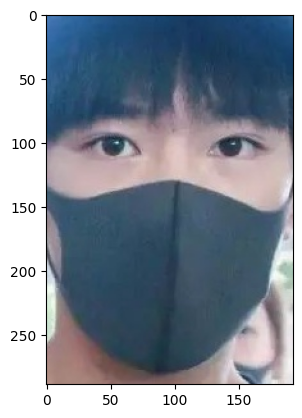

In [15]:
#Display the images with mask

img = mpimg.imread('/content/data/with_mask/with_mask_1017.jpg')
imgplot = plt.imshow(img)
plt.show()

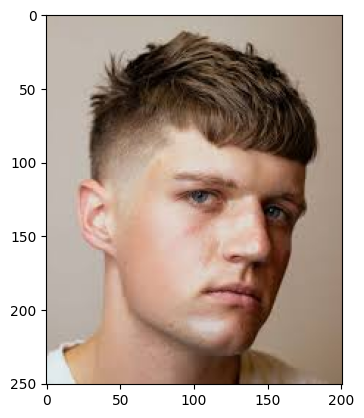

In [16]:
#Display the images without mask

img = mpimg.imread('/content/data/without_mask/without_mask_1017.jpg')
imgplot = plt.imshow(img)
plt.show()

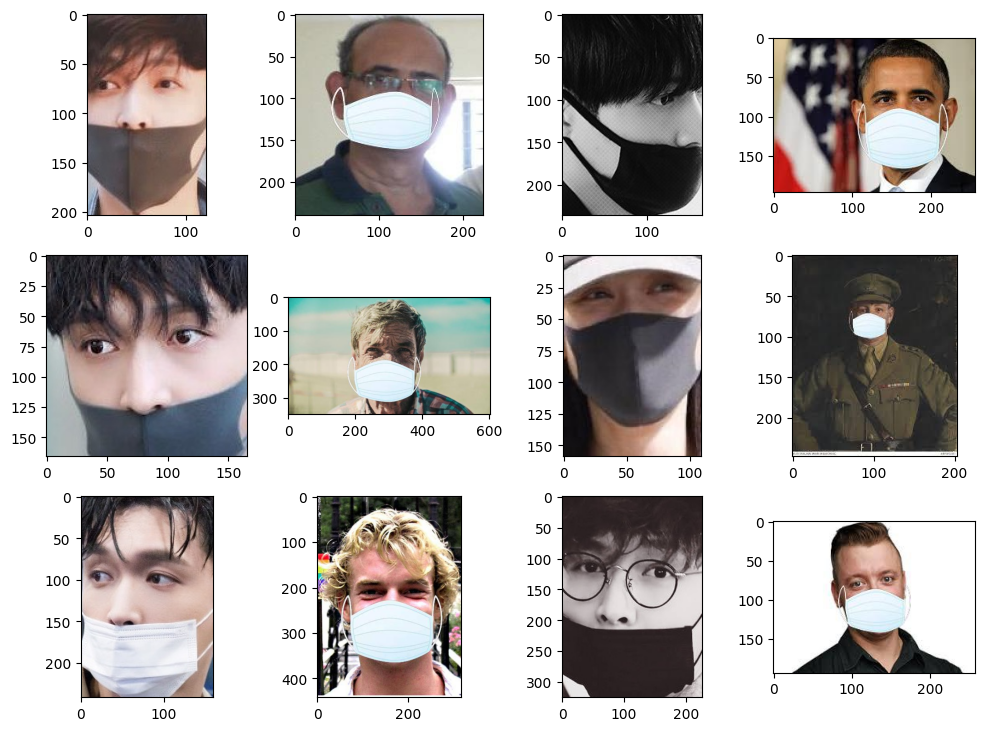

In [17]:
#  print the 12 images from the imges with mask

plt.figure(figsize=(12,12))

for i in range(12):
  plt.subplot(4,4,i+1)
  img = mpimg.imread('/content/data/with_mask/with_mask_'+str(1001+i)+'.jpg')
  imgplot = plt.imshow(img)
plt.show()


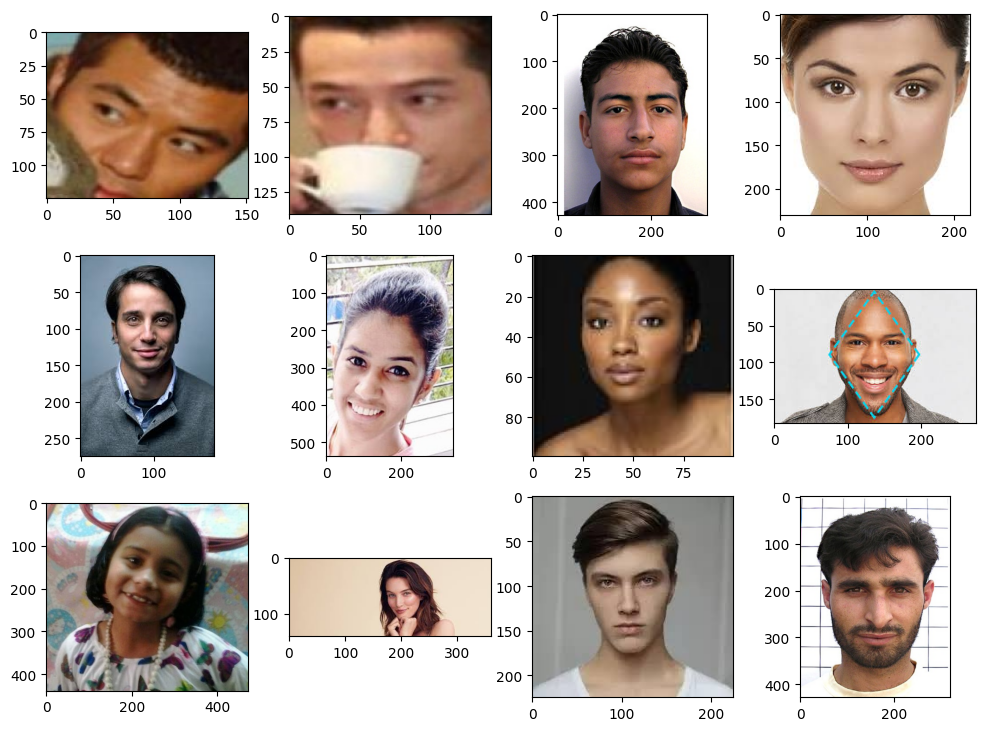

In [18]:
#print the 12 imgages without mask

plt.figure(figsize = (12,12))

for i in range(12):
  plt.subplot(4,4,i+1)
  img = mpimg.imread('/content/data/without_mask/without_mask_'+str(1001+i)+'.jpg')
  imgplot = plt.imshow(img)

plt.show()

### **Converting the Labels for the two class of images**

In [19]:
#Convert the images to numpy array of with mask images

with_mask_path = '/content/data/with_mask/'

data = []

# Use os.listdir to get a list of files in the directory
for img_file in os.listdir(with_mask_path):
  img = Image.open(os.path.join(with_mask_path, img_file)) #concatenate the path using os.path.join
  img = img.resize((128,128)) #re-size the shape of the images
  img = img.convert('RGB')#Convert the image into RGB color channel
  image = np.array(img)#convert to numpy array
  data.append(img)



#Convert the images to numpy array of without mask images

with_out_mask_path = '/content/data/without_mask/'

# Use os.listdir for this directory as well
for img_file in os.listdir(with_out_mask_path):
  # Make sure to use the correct path here
  img = Image.open(os.path.join(with_out_mask_path, img_file)) #concatenate the path using os.path.join
  img = img.resize((128,128)) #re-size the shape of the images
  img = img.convert('RGB')#Convert the image into RGB color channel
  image = np.array(img)#convert to numpy array
  data.append(img)

In [20]:
type(data)

list

In [21]:
len(data)

7553

In [22]:
data #constis the pixel values

[<PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=12

In [23]:
type(data[0])

PIL.Image.Image

In [24]:
data[0].size

(128, 128)

In [25]:
# print the shape of data

import numpy as np
print(np.array(data).shape)


(7553, 128, 128, 3)


In [26]:
#Converting image list and label to numpy arrays
X = np.array(data)


y = np.array(labels)


In [27]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(X[0],"---\n",y[0])

[[[ 84  83  83]
  [ 80  81  82]
  [ 72  76  80]
  ...
  [ 51  55  56]
  [ 51  55  56]
  [ 52  56  57]]

 [[ 78  78  78]
  [ 78  77  78]
  [ 69  71  73]
  ...
  [ 49  53  54]
  [ 50  54  55]
  [ 52  56  57]]

 [[ 69  69  70]
  [ 72  72  72]
  [ 68  69  69]
  ...
  [ 45  48  49]
  [ 46  50  51]
  [ 49  53  54]]

 ...

 [[163 109  26]
  [165 109  22]
  [176 119  24]
  ...
  [ 81  90  97]
  [ 77  86  93]
  [ 83  92  99]]

 [[133  77  12]
  [135  80  12]
  [142  87  14]
  ...
  [ 60  69  73]
  [ 64  71  75]
  [ 75  81  86]]

 [[188 132  49]
  [192 137  49]
  [182 126  37]
  ...
  [ 39  45  48]
  [ 47  51  54]
  [ 61  65  68]]] ---
 1


In [29]:
print(y)

[1 1 1 ... 0 0 0]


### **Train-Test-Split**

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


### **Scaling the Data**

In [32]:
#scaling the Data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
X_test_scaled[0]

array([[[0.58823529, 0.56470588, 0.50196078],
        [0.57254902, 0.54901961, 0.48627451],
        [0.57647059, 0.55686275, 0.49803922],
        ...,
        [0.53333333, 0.49803922, 0.43137255],
        [0.49019608, 0.45490196, 0.38823529],
        [0.45490196, 0.41960784, 0.35294118]],

       [[0.56862745, 0.54509804, 0.48627451],
        [0.55294118, 0.52941176, 0.47058824],
        [0.55686275, 0.5372549 , 0.4745098 ],
        ...,
        [0.58039216, 0.54509804, 0.47843137],
        [0.53333333, 0.49803922, 0.43137255],
        [0.49019608, 0.45490196, 0.38431373]],

       [[0.55294118, 0.52941176, 0.4627451 ],
        [0.54117647, 0.51372549, 0.45098039],
        [0.54117647, 0.51764706, 0.45098039],
        ...,
        [0.63137255, 0.6       , 0.5254902 ],
        [0.58039216, 0.54901961, 0.48235294],
        [0.5372549 , 0.50588235, 0.42745098]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Bulding the Convolution Neural Network**

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy


In [35]:
# Number of output classes (with mask, without mask)
num_of_classes = 2

# Initialize a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, each of size 3x3, and ReLU activation
# This layer also specifies the input shape for the model, which is (128, 128, 3)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))

# Add a max pooling layer with a pool size of 2x2 to reduce the spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters, each of size 3x3, and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layer to create a 1D feature vector
model.add(Flatten())

# Add a dense (fully connected) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Add another dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add another dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Add the final dense layer with 'num_of_classes' units (2 in this case) and sigmoid activation
# This is the output layer, which will output probabilities for each class (with mask, without mask)
model.add(Dense(num_of_classes, activation='sigmoid'))



In [36]:
#compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [37]:

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [38]:
##Trining the neural network
history  = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs =10)

Epoch 1/10
170/170 [==============================] - 15s 23ms/step - loss: 0.4985 - accuracy: 0.7933 - val_loss: 0.3153 - val_accuracy: 0.8678
Epoch 2/10
170/170 [==============================] - 3s 18ms/step - loss: 0.3038 - accuracy: 0.8795 - val_loss: 0.2544 - val_accuracy: 0.8942
Epoch 3/10
170/170 [==============================] - 3s 19ms/step - loss: 0.2498 - accuracy: 0.8999 - val_loss: 0.2077 - val_accuracy: 0.9157
Epoch 4/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2038 - accuracy: 0.9191 - val_loss: 0.2068 - val_accuracy: 0.9124
Epoch 5/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1806 - accuracy: 0.9294 - val_loss: 0.1953 - val_accuracy: 0.9273
Epoch 6/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1549 - accuracy: 0.9389 - val_loss: 0.1967 - val_accuracy: 0.9256
Epoch 7/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1349 - accuracy: 0.9505 - val_loss: 0.2097 - val_accuracy: 0.938

### **Model Evaluation**

In [40]:
#Evalute the model
loss,accuracy = model.evaluate(X_test_scaled,y_test)
print('Test Accuracy:- ',accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2566 - accuracy: 0.9312
Test Accuracy:-  0.9311714172363281


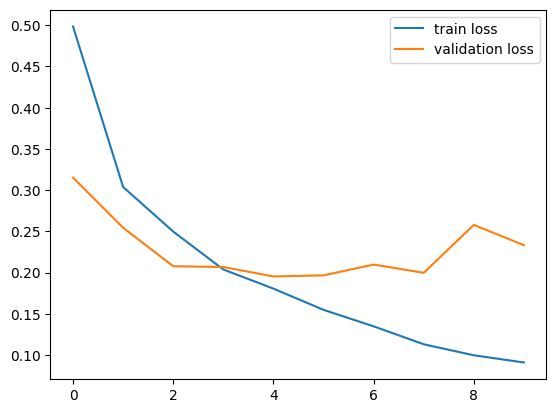

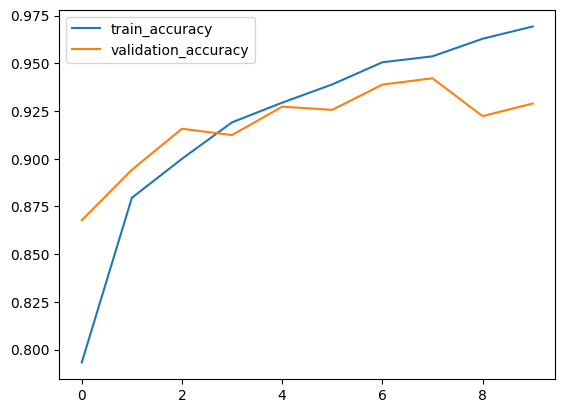

In [43]:
h = history
#plot the loss value

plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'],label ='validation loss')
plt.legend()
plt.show()



#Plot the Accuracy value
plt.plot(h.history['accuracy'],label = 'train_accuracy')
plt.plot(h.history['val_accuracy'],label = 'validation_accuracy')
plt.legend()
plt.show()


### **Predictive System**

Give the Path of the Image to be Predicted/content/images_Msk_wmsk_.jpeg


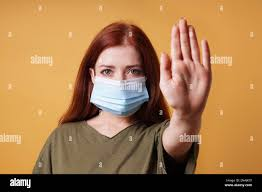

1/1 [==============================] - 0s 18ms/step
[[0.49921322 0.5263186 ]]
1
The Preson is With Mask


In [48]:
input_img_path = input('Give the Path of the Image to be Predicted')

input_image = cv2.imread(input_img_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized / 255

input_image_reshape = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:
  print('The Preson is With Mask')
else:
  print('The Person without Mask')
